# Application du KNN pour la classification 

In [2]:
# importation de toutes les libraires nécessaires 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Figure size 1280x960 with 0 Axes>

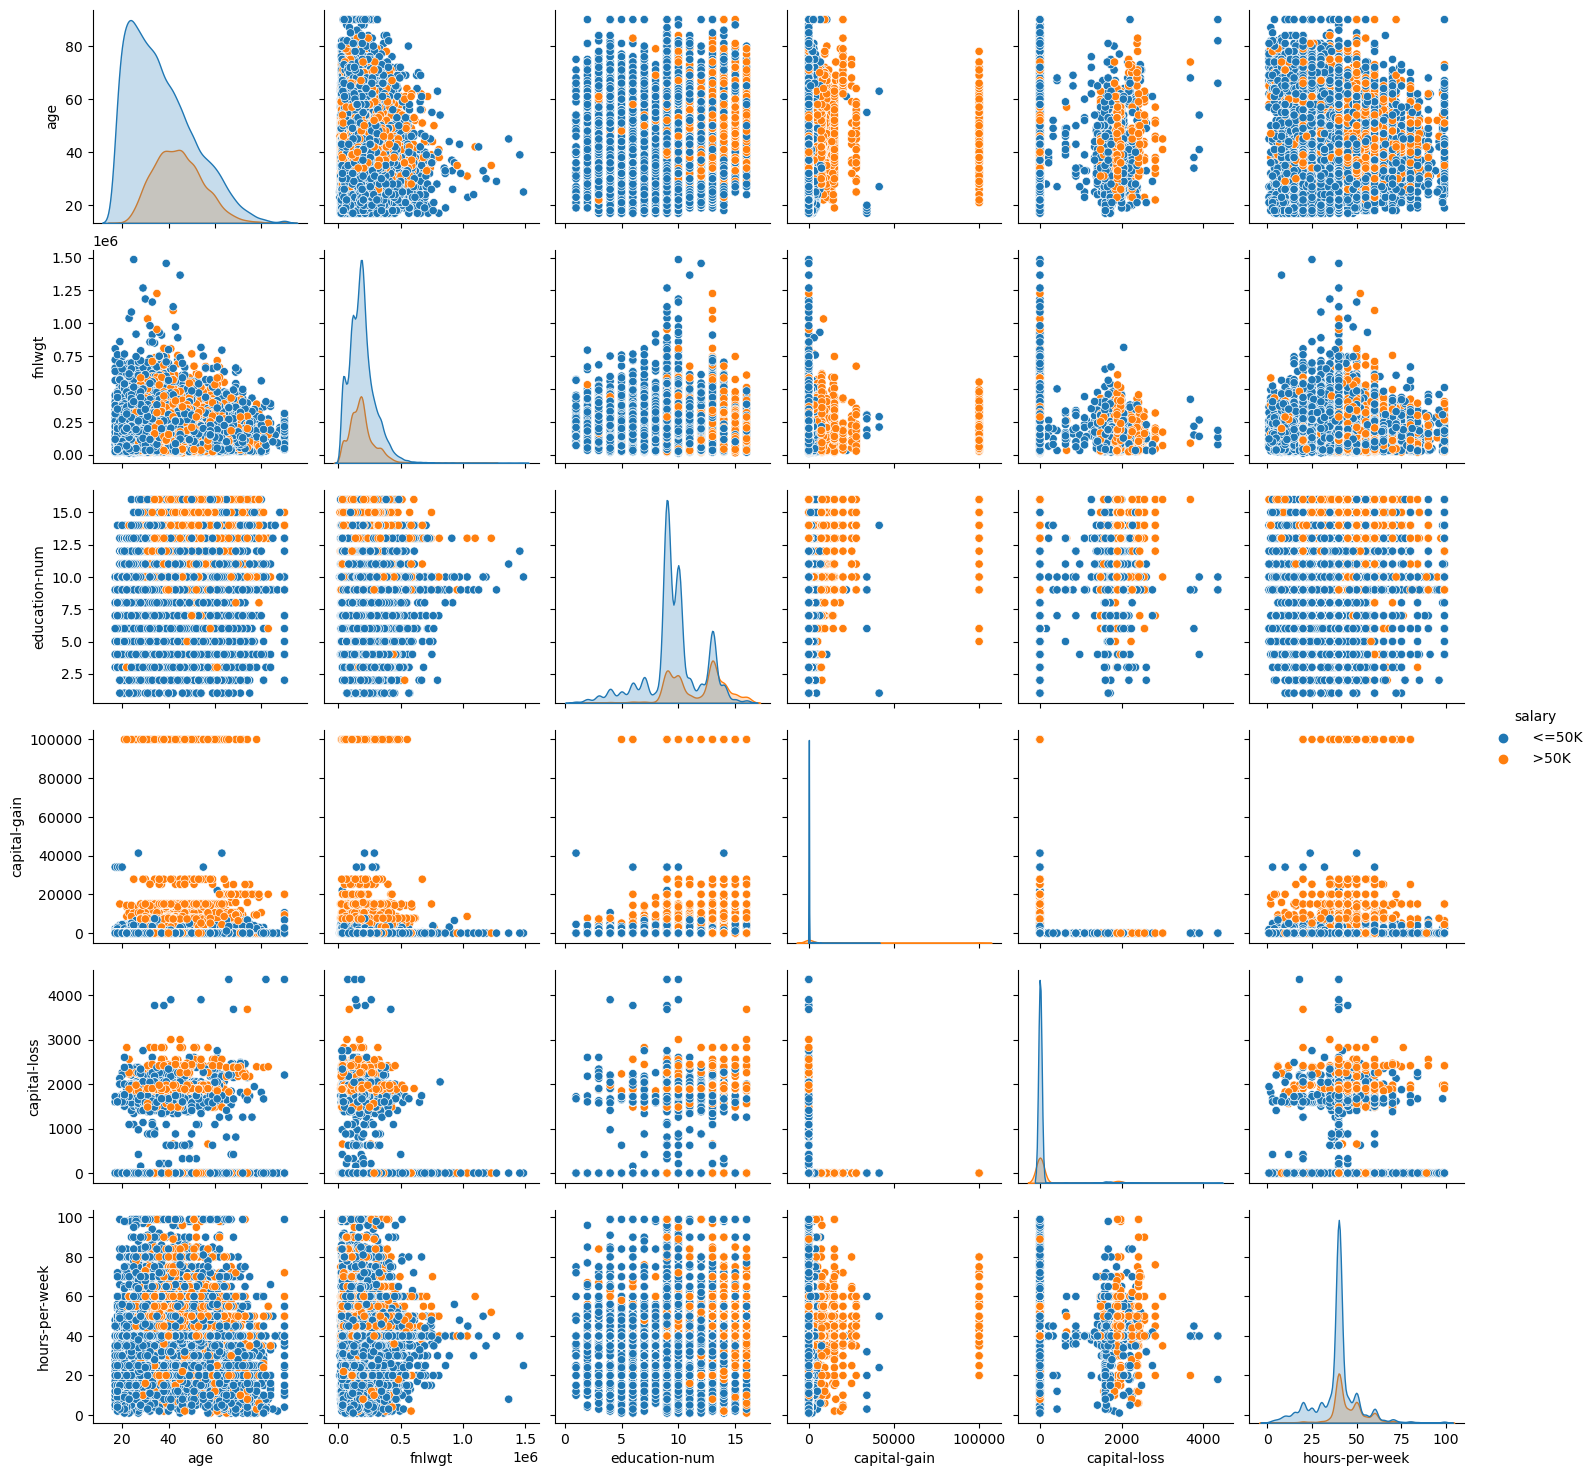

In [16]:
plt.figure(dpi=200)
sns.pairplot(data=df, hue='salary')

In [35]:
df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

# One hot encoding sur les variables qualitatives

In [43]:
XApp = pd.get_dummies(df[df.columns[:-1]],drop_first=True)
XApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ Federal-gov                      32561 non-null  uint8
 7   workclass_ Local-gov                        32561 non-null  uint8
 8   workclass_ Never-worked                     32561 non-null  uint8
 9   workclass_ Private                          32561 non-null  uint8
 10  workclass_ Self-emp-inc          

In [45]:
XApp.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
def frequence(D):
    for v in D.columns:
        if (D[v].dtype == 'object'):
            print(D[v].value_counts())
            print("----")
            
            
frequence(df)
            

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
----
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
----
 Prof-specialty       4140
 Craft-repair         4099
 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage binaire sur la colonne 'salary'
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])

# Afficher le résultat
print(df[['salary', 'salary_encoded']].head())


   salary  salary_encoded
0   <=50K               0
1   <=50K               0
2   <=50K               0
3   <=50K               0
4   <=50K               0


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV

In [52]:
# le X et le Y 
X = XApp
y = df.salary_encoded

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=42)
k_values = list(range(1,30))

In [57]:
best_k

19

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : k_values}

grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train,y_train)

cv_scores = grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']

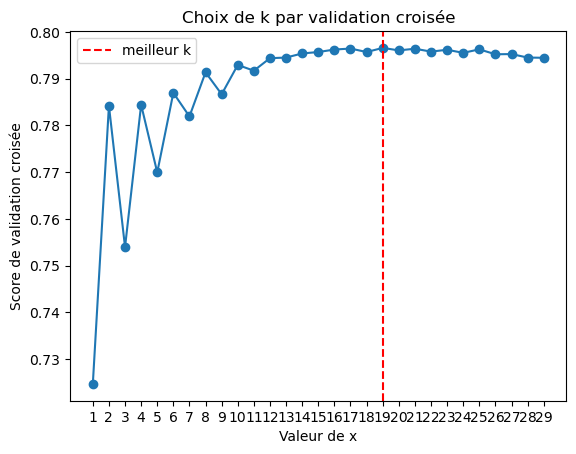

In [58]:
plt.plot(k_values, cv_scores, '-o' )
plt.xlabel('Valeur de x')
plt.ylabel('Score de validation croisée')
plt.title('Choix de k par validation croisée')
plt.xticks(k_values)
plt.axvline(x=best_k, color='r',linestyle= '--', label ='meilleur k')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import roc_curve , roc_auc_score ,accuracy_score
best_model=grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:,1]

y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:,1]

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test , y_test_pred)

print("Exactitude sur l'ensemble d'entrainement : {:.2f}%".format(accuracy_train*100))


print("Exactitude sur l'ensemble de test : {:.2f}%".format(accuracy_test*100))

/home/brantcho/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/brantcho/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Exactitude sur l'ensemble d'entrainement : 80.26%
Exactitude sur l'ensemble de test : 80.42%
